# **Predicting Diabetes using Various Classification Algorithms**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [4]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Understanding the Data

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.shape

(768, 9)

In [9]:
df.size

6912

In [10]:
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [18]:
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [26]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### ****As we have seen that some of the features such as BloodPressure,SkinThickness,BMI,Insulin ,Glucose can't be zero****

In [29]:
#Now handle those zero values with median of that feature
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
# df['BloodPressure'].median()

# Visualization

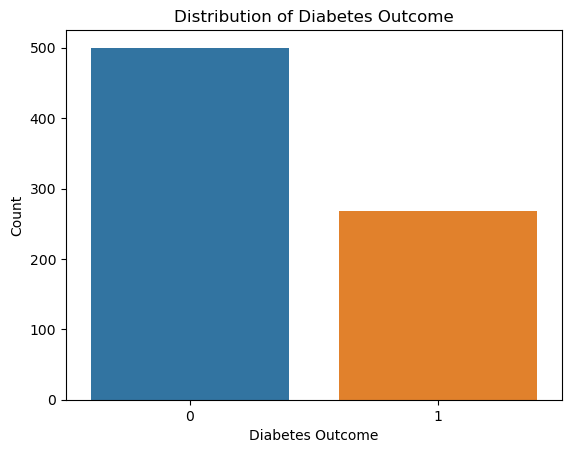

In [32]:
# Create a count plot
sns.countplot(x='Outcome', data=df)
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Outcome')
plt.show()

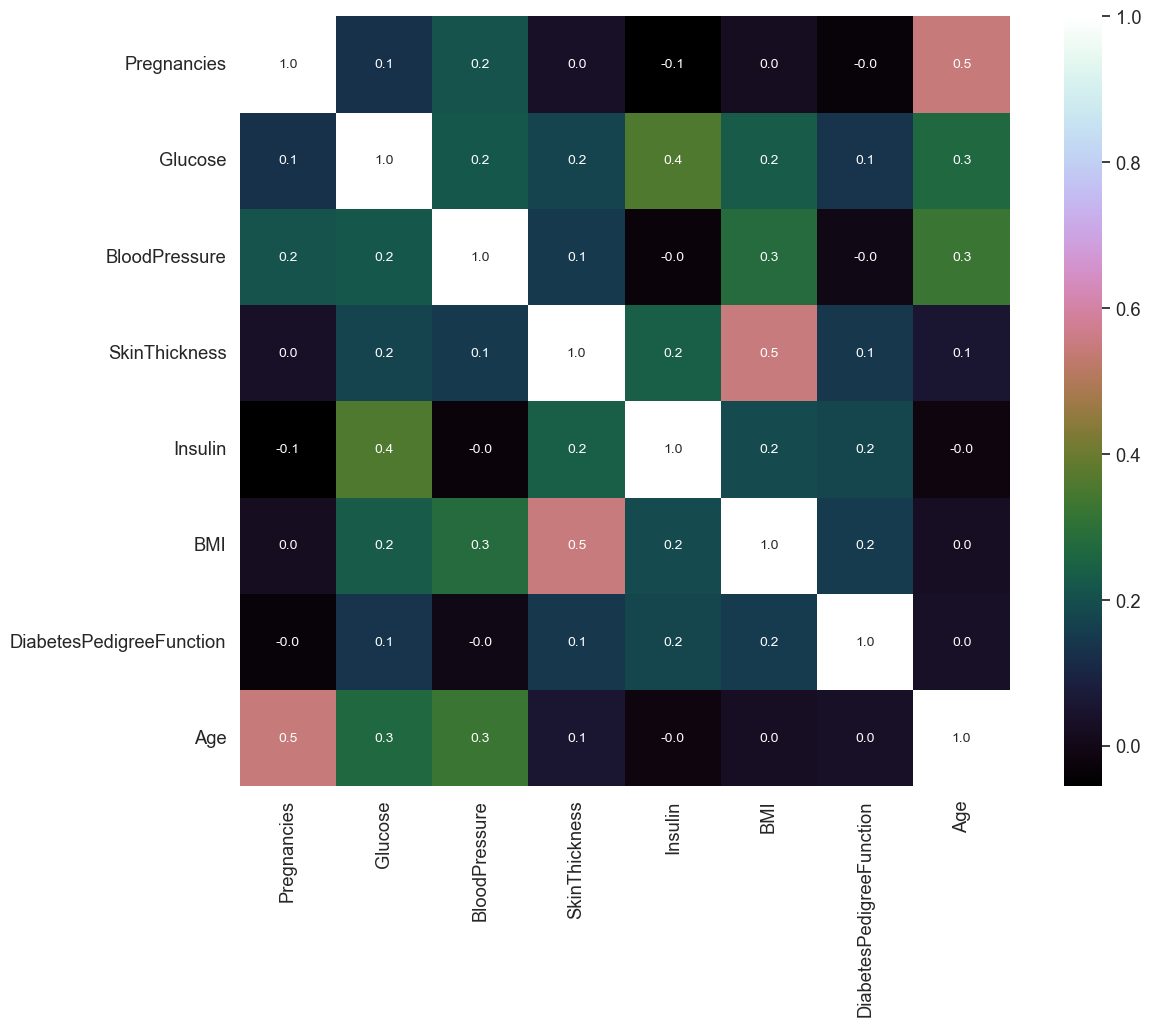

In [34]:
plt.figure(figsize=(14,10))
sns.set(style='whitegrid', context='notebook')
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.2)
hm = sns.heatmap(cm,cmap='cubehelix',cbar=True,annot=True,square=True,fmt='.1f',annot_kws={'size': 10},yticklabels=cols,xticklabels=cols)
plt.show()

# Splitting of dataset into dependent and independent variables

In [37]:
X = df[cols] # Features
Y = df.Outcome # Target variable

In [39]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [41]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Splitting the data in Training and Testing

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

# Standarization
**The features value are in diffrent ranges.So now we normalize the data in such a way that their mean=0 and Std.Deviation=1**

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Classification

In [50]:
#now we train our data on logistic regression model

from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state=2)
lm.fit(X_train, Y_train)

LogisticRegression(random_state=2)

## Prediction

In [56]:
Y_pred_train = lm.predict(X_train)
Y_pred_test = lm.predict(X_test)
print(Y_pred_test)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


### Accuracy

In [59]:
from sklearn.metrics import accuracy_score
lr_train_acc = accuracy_score(Y_train,Y_pred_train)
lr_test_acc =  accuracy_score(Y_test,Y_pred_test)
print(lr_train_acc)
print(lr_test_acc)

0.7687296416938111
0.8181818181818182


## Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix, f1_score
def confusion_matrix_plot(test,pred_test):
    cmat = confusion_matrix(test, pred_test)
    sns.heatmap(pd.DataFrame(cmat), annot=True, cmap="YlGn" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    

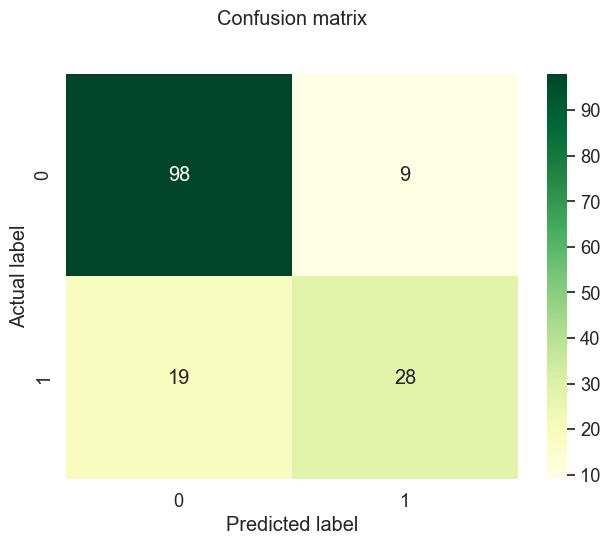

In [94]:
confusion_matrix_plot(Y_test,Y_pred_test)

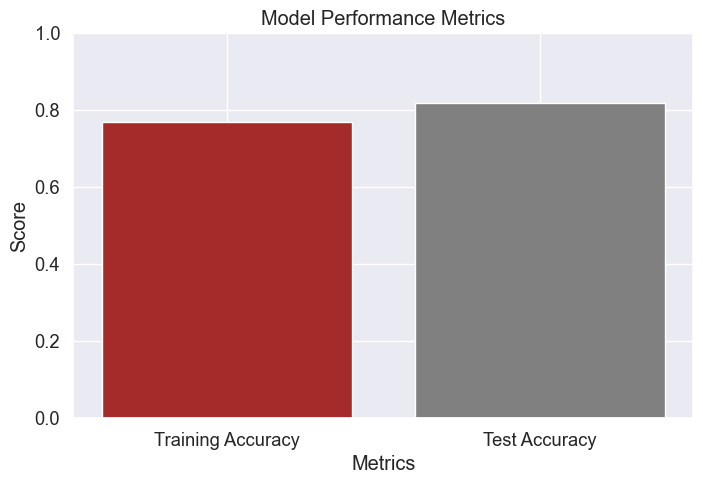

In [204]:
# Create bar graph
metrics = ['Training Accuracy', 'Test Accuracy']
scores = [lr_train_acc, lr_test_acc]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['brown', 'grey', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)  # F1 Score and accuracy ranges from 0 to 1
plt.show()

In [166]:
f1 = f1_score(Y_test, Y_pred_test)
print("F1 Score:",f1)

F1 Score: 0.6666666666666666


####  F1 Score for Logistic Regression : 0.6666666666666666

# Decision Tree

In [214]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

#fitting data
dt.fit(X_train,Y_train)

#predicting values
dt_Y_pred_train = dt.predict(X_train) 
dt_Y_pred_test = dt.predict(X_test)

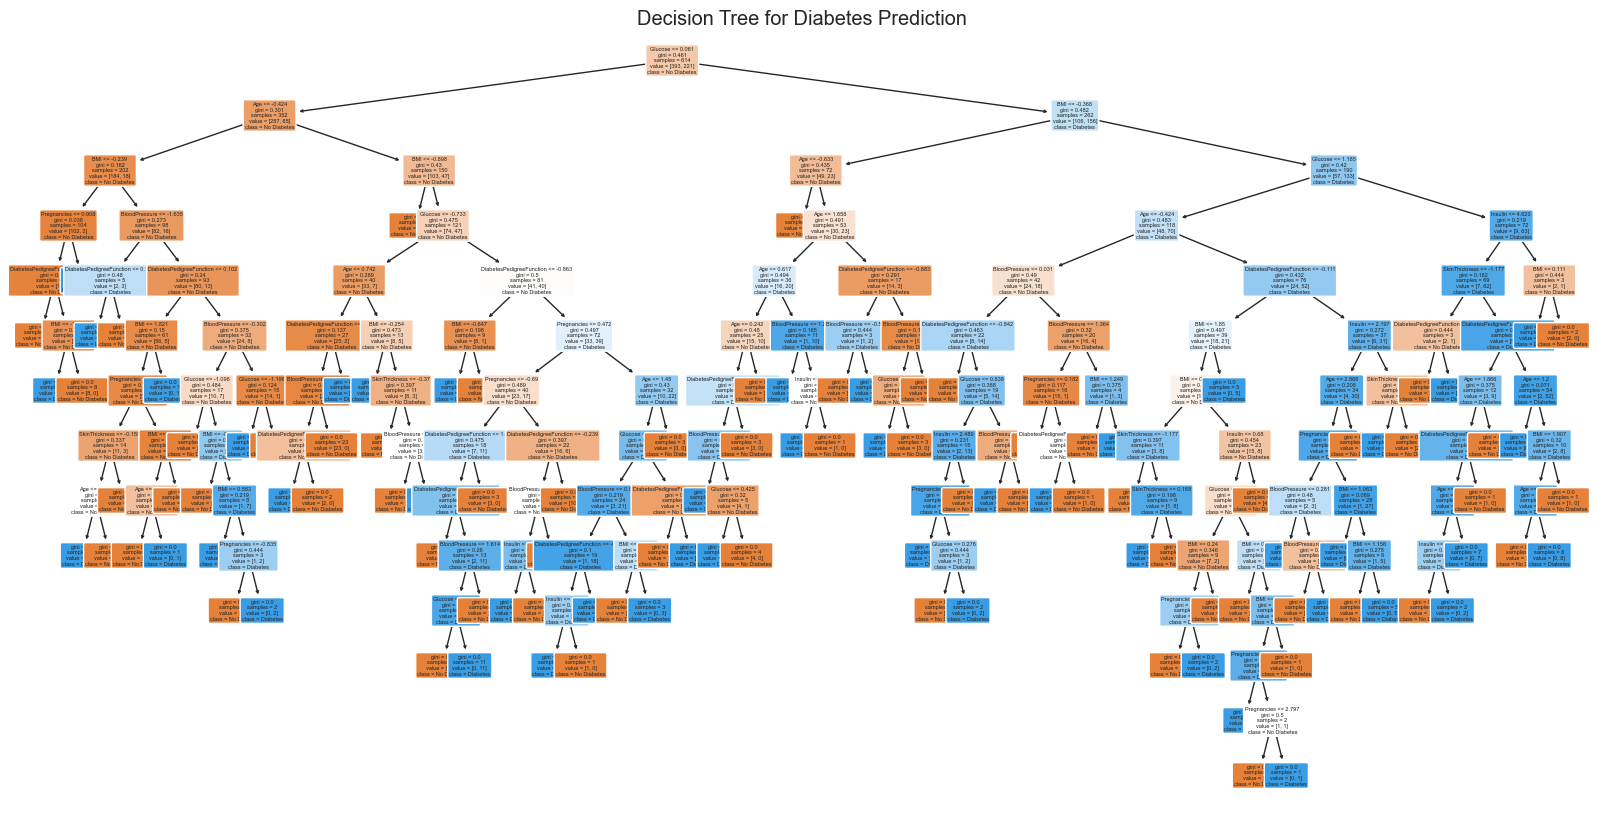

In [237]:
from sklearn.tree import plot_tree

# Converting X.columns to a list
feature_names = X.columns.tolist()

# Plotting the decision tree
plt.figure(figsize=(20,10))  # Set the size of the plot
plot_tree(dt, feature_names=feature_names, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True, fontsize=4)
plt.title('Decision Tree for Diabetes Prediction')
plt.show()

## Accuracy

In [100]:
dt_train_acc = accuracy_score(Y_train,dt_Y_pred_train)
dt_test_acc = accuracy_score(Y_test,dt_Y_pred_test)
print(dt_train_acc)
print(dt_test_acc)

1.0
0.7597402597402597


## Confusion Matrix

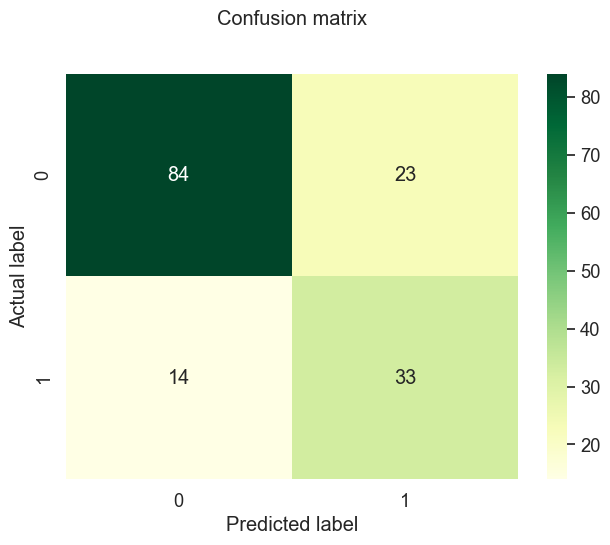

In [103]:
confusion_matrix_plot(Y_test,dt_Y_pred_test)

In [104]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, dt_Y_pred_test)
print("F1 Score:",f1)

F1 Score: 0.6407766990291263


####  F1 Score for Decision Tree : 0.6407766990291263

## Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2)
rf.fit(X_train,Y_train)

rf_Y_train_pred = rf.predict(X_train)
rf_Y_test_pred = rf.predict(X_test)

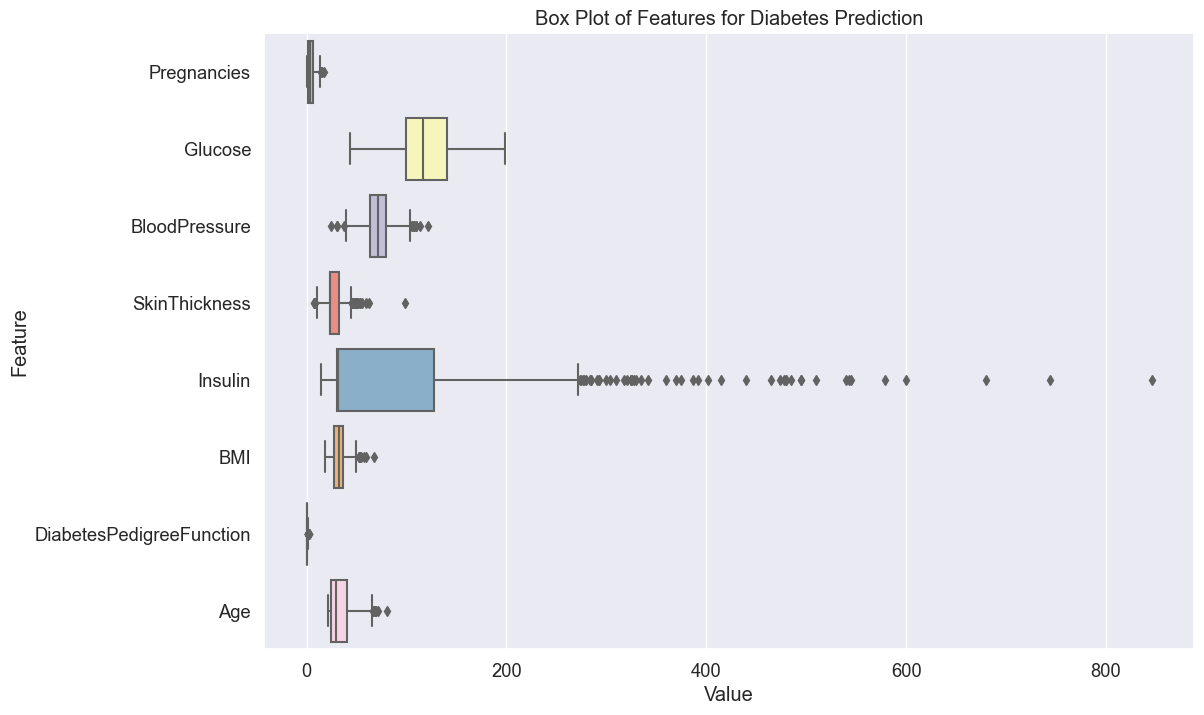

In [197]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, orient='h', palette='Set3')
plt.title('Box Plot of Features for Diabetes Prediction')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

## Accuracy

In [111]:
rf_train_acc = accuracy_score(Y_train,rf_Y_train_pred)
rf_test_acc = accuracy_score(Y_test,rf_Y_test_pred)
print(rf_train_acc)
print(rf_test_acc)

1.0
0.8181818181818182


## Confusion Matrix

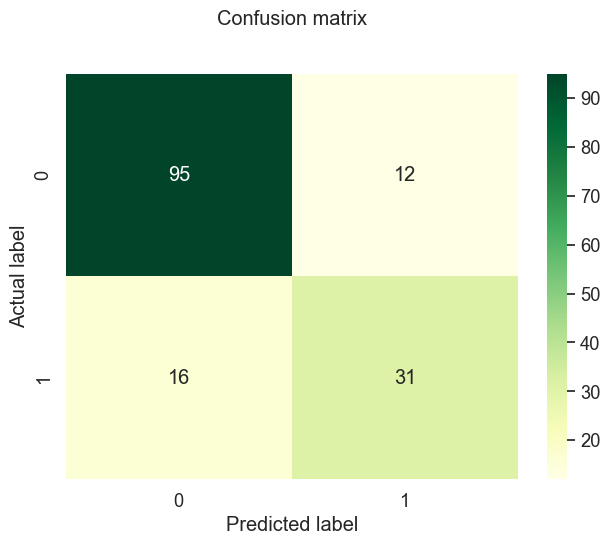

In [114]:
confusion_matrix_plot(Y_test,rf_Y_test_pred)

In [115]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, rf_Y_test_pred)
print("F1 Score:",f1)

F1 Score: 0.6888888888888888


#### F1 Score for Random Forest: 0.6888888888888888

## ROC Curve

Logistic Regression ROC Curve:


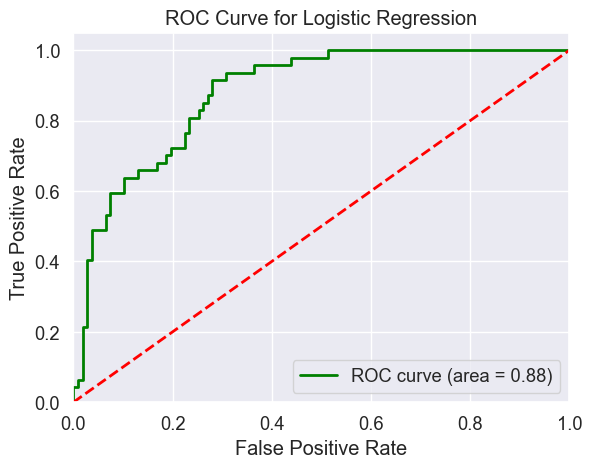

Decision Tree ROC Curve:


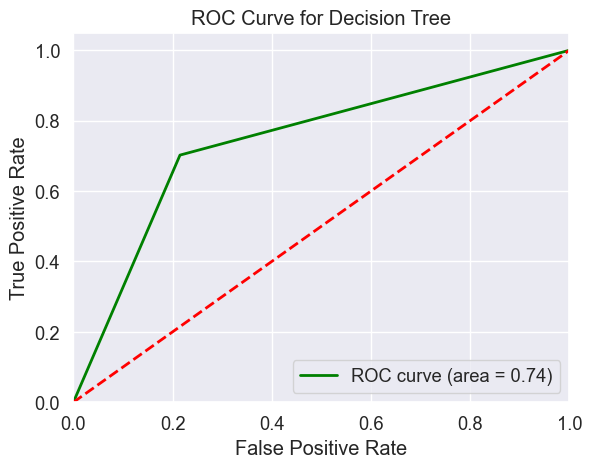

Random Forest ROC Curve:


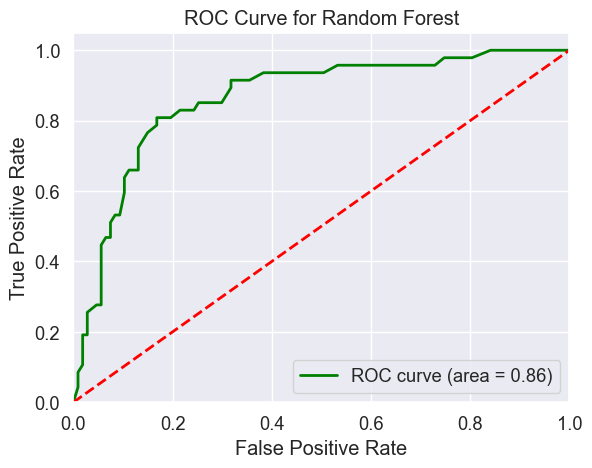

In [140]:
from sklearn.metrics import roc_curve, auc

# Define a function to plot ROC curve and calculate AUC
def plot_roc_curve(Y_true, Y_prob, model_name):
    fpr, tpr, _ = roc_curve(Y_true, Y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Get predicted probabilities
Y_prob_lr = lm.predict_proba(X_test)[:, 1]
Y_prob_dt = dt.predict_proba(X_test)[:, 1]
Y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Plot ROC curves
print("Logistic Regression ROC Curve:")
plot_roc_curve(Y_test, Y_prob_lr, 'Logistic Regression')

print("Decision Tree ROC Curve:")
plot_roc_curve(Y_test, Y_prob_dt, 'Decision Tree')

print("Random Forest ROC Curve:")
plot_roc_curve(Y_test, Y_prob_rf, 'Random Forest')

# Conclusion from the Analysis

After evaluating the performance of various models (Logistic Regression, Decision Tree, Random Forest, and SVM) using metrics such as accuracy, F1 score, precision, and recall, the Random Forest model emerged as the best-performing model for this diabetes prediction task. It offers a strong balance between accuracy and robustness, with high values across all key metrics. 

While Logistic Regression showed a slightly higher AUC in the ROC curve, the overall performance of the Random Forest model makes it the most reliable choice, especially given its ability to handle complex data patterns and provide more stable predictions. The Random Forest's capability to interpret feature importance also adds value, making it the most appropriate model for final predictions in this scenario.

## Using the trained model for making predictions on new data.

In [133]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train, Y_train)

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

print("Random Forest model saved successfully.")


Random Forest model saved successfully.


In [149]:
import pickle
import numpy as np

# Load the model from the file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

print("Random Forest model loaded successfully.")

# New data for prediction (converted to numpy array)
new_data = np.array([
    [1, 85, 66, 29, 0, 26.6, 0.351, 31],
    [2, 120, 80, 33, 120, 30.0, 0.500, 45]
])

# Predict using the loaded model
predictions = loaded_rf_model.predict(new_data)
print("Predictions:", predictions)

Random Forest model loaded successfully.
Predictions: [1 1]
